In [1]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neural_network import MLPClassifier
from joblib import dump, load
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
import numpy as np
import itertools

In [2]:
#nltk.download()
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\giova\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Testes com o dataset FakeBRCorpus - Arquivos

In [3]:
def plota_matriz_de_confusao(cm,
                             target_names,
                             title='Confusion matrix',
                             cmap=None,
                             normalize=True):
    
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('YlOrBr')

    plt.figure(figsize=(5, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Real')
    plt.xlabel('Predito')
    plt.show()

## Documentação do método para apresentar, via gráfico, a matriz de confusão:    
### def plota_matriz_de_confusao(cm, target_names, title='Confusion matrix', cmap=None, normalize=True)
    
    Dada uma matriz de confusão (cm), mostra um gráfico:

    Arguments
    ---------
    cm:           matriz de confusão do sklearn.metrics.confusion_matrix

    target_names: dadas as classes tais [0,1,2], os nomes das classes[alto, médio, baixo]
    
    title:        título do gráfico

    cmap:         o gradiente dos valores exibidos como em matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    Se falso, imprime números inteiros
                  Se verdadeiro, imprime as proporções

    Exemplo de utilização:
    -----
    plota_matriz_de_confusao(cm           = cm,                  # Matriz de confusão criada
                                                                 # sklearn.metrics.confusion_matrix
                             normalize    = True,                # mostra proporções ou frações
                             target_names = y_labels_vals,       # lista dos nomes das classes
                             title        = nome do estimador)   # Título do gráfico

    Citação
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

In [4]:
stop_por = set(stopwords.words("portuguese"))
def limpa_texto(string):
    text = string.lower().split()
    text = " ".join(text)
    text = re.sub(r"http(\S)+",' ',text)    
    text = re.sub(r"www(\S)+",' ',text)
    text = re.sub(r"&",' and ',text)  
    tx   = text.replace('&amp',' ')
    text = re.sub(r"[^0-9a-zA-Z]+",' ',text)
    text = text.split()
    text = [w for w in text if not w in stop_por]
    text = " ".join(text)
    return text

In [5]:
def imprime_metricas(pred,true):
    print(confusion_matrix(true,pred))
    print(classification_report(true,pred,))
    print("Acurácia : ",accuracy_score(pred,true))
    print("Precisão : ",precision_score(pred,true, average = 'weighted'))
    print("Recall   : ",recall_score(pred,true,  average = 'weighted'))
    print("F1       : ",f1_score(pred,true,  average = 'weighted'))

In [6]:
#
# Testes com o dataset FAKEBRCORPUS
#
# Testes com os arquivos com mensagens maiores de 200 caracteres
#
#treino    = pd.read_csv('dataset_200_palavras_shuffle_train.csv')
#validacao = pd.read_csv('dataset_200_palavras_shuffle_val.csv')
#treino    = pd.read_csv('dataset_100_palavras_shuffle_train.csv')
#validacao = pd.read_csv('dataset_100_palavras_shuffle_val.csv')
treino    = pd.read_csv('dataset_shuffle_train.csv')
validacao = pd.read_csv('dataset_shuffle_val.csv')

In [7]:
treino['text'] = treino['text'].map(lambda x: limpa_texto(x))
validacao['text'] = validacao['text'].map(lambda x: limpa_texto(x))    

# Testes com meu dataset FakeBRCorpus - LinearSVC

SVM
val:
[[1000   81]
 [  96  985]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1081
           1       0.92      0.91      0.92      1081

    accuracy                           0.92      2162
   macro avg       0.92      0.92      0.92      2162
weighted avg       0.92      0.92      0.92      2162

Acurácia :  0.9181313598519889
Precisão :  0.9182276321047853
Recall   :  0.9181313598519889
F1       :  0.918135300880905


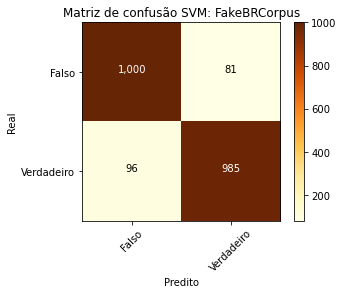

In [49]:
pipeline = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c', LinearSVC())
    ])
fit = pipeline.fit(treino['text'],treino['fake_news'])
print('SVM')
print ('val:')
pred=pipeline.predict(validacao['text'])
imprime_metricas(pred,validacao['fake_news'])
plota_matriz_de_confusao(confusion_matrix(validacao['fake_news'],pred),
                         target_names=['Falso','Verdadeiro'], 
                         normalize = False, 
                         title = 'Matriz de confusão SVM: FakeBRCorpus')

#val_ori = pd.read_csv('dataset_200_palavras_shuffle_val.csv')
#svm_val_misclass_df = val_ori[pred!=validacao['text']]

# Testes com o dataset FakeBRCorpus - Logistic Regression

Logistic Regression
val:
[[977 104]
 [103 978]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1081
           1       0.90      0.90      0.90      1081

    accuracy                           0.90      2162
   macro avg       0.90      0.90      0.90      2162
weighted avg       0.90      0.90      0.90      2162

Acurácia :  0.9042553191489362
Precisão :  0.9042557470256153
Recall   :  0.9042553191489362
F1       :  0.9042553396323986


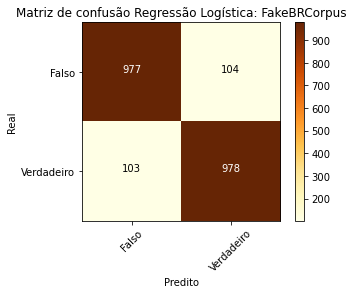

In [50]:
pipeline = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c', LogisticRegression())
    ])
fit = pipeline.fit(treino['text'],treino['fake_news'])
print('Logistic Regression')
print ('val:')
pred=pipeline.predict(validacao['text'])
imprime_metricas(pred,validacao['fake_news'])
plota_matriz_de_confusao(confusion_matrix(validacao['fake_news'],pred),
                         target_names=['Falso','Verdadeiro'], 
                         normalize = False,
                         title = 'Matriz de confusão Regressão Logística: FakeBRCorpus')

# Testes com o dataset FakeBRCorpus - GradientBoostingClassifier

Gradient Boost
val:
[[1016   65]
 [ 114  967]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1081
           1       0.94      0.89      0.92      1081

    accuracy                           0.92      2162
   macro avg       0.92      0.92      0.92      2162
weighted avg       0.92      0.92      0.92      2162

Acurácia :  0.9172062904717854
Precisão :  0.9182336223782926
Recall   :  0.9172062904717854
F1       :  0.9172488406380853


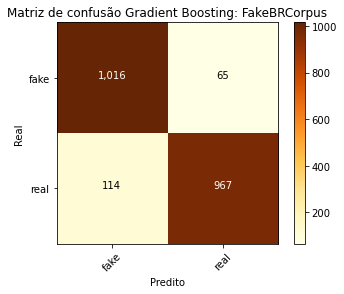

In [51]:
pipeline = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c', GradientBoostingClassifier())
    ])
fit = pipeline.fit(treino['text'],treino['fake_news'])
print('Gradient Boost')
print ('val:')
pred=pipeline.predict(validacao['text'])
imprime_metricas(pred,validacao['fake_news'])
plota_matriz_de_confusao(confusion_matrix(validacao['fake_news'],pred),
                         target_names=['fake','real'], 
                         normalize = False,
                         title = 'Matriz de confusão Gradient Boosting: FakeBRCorpus')

# Testes com o dataset FakeBRCorpus - Árvore de decisão

Decision Tree
val:
[[968 113]
 [213 868]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1081
           1       0.88      0.80      0.84      1081

    accuracy                           0.85      2162
   macro avg       0.85      0.85      0.85      2162
weighted avg       0.85      0.85      0.85      2162

Acurácia :  0.849213691026827
Precisão :  0.8534924578177776
Recall   :  0.849213691026827
F1       :  0.8495369723752582


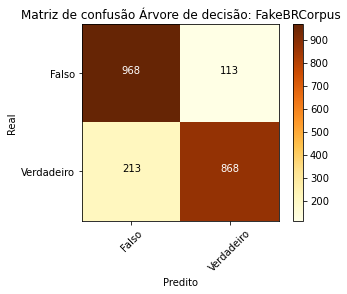

In [52]:
#minor variations in finla results due to randomness
pipeline = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c', tree.DecisionTreeClassifier())
    ])
fit = pipeline.fit(treino['text'],treino['fake_news'])
print('Decision Tree')
print ('val:')
pred=pipeline.predict(validacao['text'])
imprime_metricas(pred,validacao['fake_news'])
plota_matriz_de_confusao(confusion_matrix(validacao['fake_news'],pred),
                         target_names=['Falso','Verdadeiro'], 
                         normalize = False,
                         title = 'Matriz de confusão Árvore de decisão: FakeBRCorpus')

# Testes com o dataset FakeBRCorpus - Rede Neural MLP

Decision Tree
val:
[[1029   52]
 [ 137  944]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1081
           1       0.95      0.87      0.91      1081

    accuracy                           0.91      2162
   macro avg       0.92      0.91      0.91      2162
weighted avg       0.92      0.91      0.91      2162

Acurácia :  0.9125809435707678
Precisão :  0.9156723525772296
Recall   :  0.9125809435707678
F1       :  0.9127162767851175


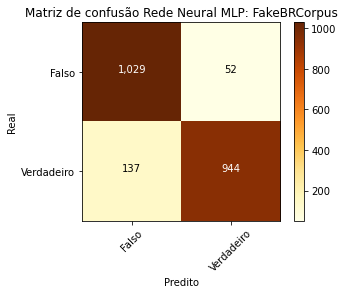

In [53]:
#minor variations in finla results due to randomness
pipeline = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c', MLPClassifier())
    ])
fit = pipeline.fit(treino['text'],treino['fake_news'])
print('Decision Tree')
print ('val:')
pred=pipeline.predict(validacao['text'])
imprime_metricas(pred,validacao['fake_news'])
plota_matriz_de_confusao(confusion_matrix(validacao['fake_news'],pred),
                         target_names=['Falso','Verdadeiro'], 
                         normalize = False,
                         title = 'Matriz de confusão Rede Neural MLP: FakeBRCorpus')

In [ ]:
svm_val_misclass_df.info()

In [ ]:
svm_val_misclass_df.to_excel('svm_val_misclassified.xlsx')

In [ ]:
svm_val_misclass_df.to_csv('svm_val_misclassified.csv')